In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [44]:
df=pd.read_csv('match_result.csv')

In [45]:
df

,home_gk_overall,home_dc_overall,home_mid_overall,home_st_overall,away_gk_overall,away_dc_overall,away_mid_overall,away_st_overall,homeScore,awayScore,matchResult
0,67.0,64.400000,66.750000,67.000000,90.0,77.250000,86.800000,85.500000,0,3,Away
1,74.0,78.000000,82.250000,80.333333,69.0,67.000000,65.750000,65.500000,2,1,Home
2,72.0,66.250000,63.400000,68.000000,70.0,70.750000,70.250000,71.333333,1,1,Draw
3,73.0,73.250000,64.000000,64.500000,65.0,61.333333,63.333333,63.500000,4,1,Home
4,75.0,66.500000,69.500000,64.000000,73.0,68.500000,67.666667,66.750000,0,1,Away
...,...,...,...,...,...,...,...,...,...,...,...
1395,66.0,68.250000,67.000000,62.250000,68.0,73.000000,63.666667,61.500000,1,0,Home
1396,69.0,62.000000,63.000000,61.500000,78.0,63.500000,68.250000,68.500000,3,0,Home
1397,70.0,74.166667,73.333333,62.666667,76.0,64.000000,79.666667,78.333333,1,1,Draw
1398,78.0,62.000000,63.000000,79.000000,63.0,61.500000,76.333333,65.000000,2,0,Home


In [46]:
df.drop(['homeScore', 'awayScore'], axis=1, inplace=True)

In [47]:
df['matchResult'].replace(['Away','Home','Draw'], [1,2,0], inplace=True)

In [48]:
df.isnull().sum()

home_gk_overall     0
home_dc_overall     0
home_mid_overall    0
home_st_overall     0
away_gk_overall     0
away_dc_overall     0
away_mid_overall    0
away_st_overall     0
matchResult         0
dtype: int64

In [49]:
X = df.drop('matchResult',axis=1)
y = df['matchResult']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [51]:
X_train.shape

(1120, 8)

In [52]:
#import autokeras as ak
# Autokeras 다중 분류 모델 정의
# clf = ak.StructuredDataClassifier(overwrite=True, max_trials=10)

In [53]:


model = Sequential()
model.add(Dense(8, input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(55, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

c:\Users\Jeong\anaconda3\envs\auto\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 55)             │         7,095 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │           168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,847 (46.28 KB)

 Trainable params: 11,847 (46.28 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [55]:

early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=40)
history = model.fit(X_train, y_train, epochs=500, batch_size = 10,
                    validation_split=0.25,verbose=1, callbacks=[early_stopping_callback])

Epoch 1/500


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3842 - loss: 1.3639 - val_accuracy: 0.3321 - val_loss: 1.2028
Epoch 2/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3819 - loss: 1.2897 - val_accuracy: 0.2571 - val_loss: 1.5087
Epoch 3/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3549 - loss: 1.2220 - val_accuracy: 0.4107 - val_loss: 1.1213
Epoch 4/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3490 - loss: 1.1656 - val_accuracy: 0.2571 - val_loss: 1.3662
Epoch 5/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3694 - loss: 1.1729 - val_accuracy: 0.4107 - val_loss: 1.1635
Epoch 6/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3757 - loss: 1.1296 - val_accuracy: 0.4107 - val_loss: 1.1141
Epoch 7/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4728 - loss: 1.0688 - val_accuracy: 0.4107 - val_loss: 1.0852
Epoch 8/500
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4658 - loss: 1.0832 - val_accuracy: 0.4036 - val_loss: 1.0

In [56]:
# 테스트 데이터 로드
# X_test, y_test = ...

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)

# 평가 결과 출력
print(f"손실(loss): {loss:.4f}")
print(f"정확도(accuracy): {accuracy:.4f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4257 - loss: 1.0811  
손실(loss): 1.0840
정확도(accuracy): 0.4179


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


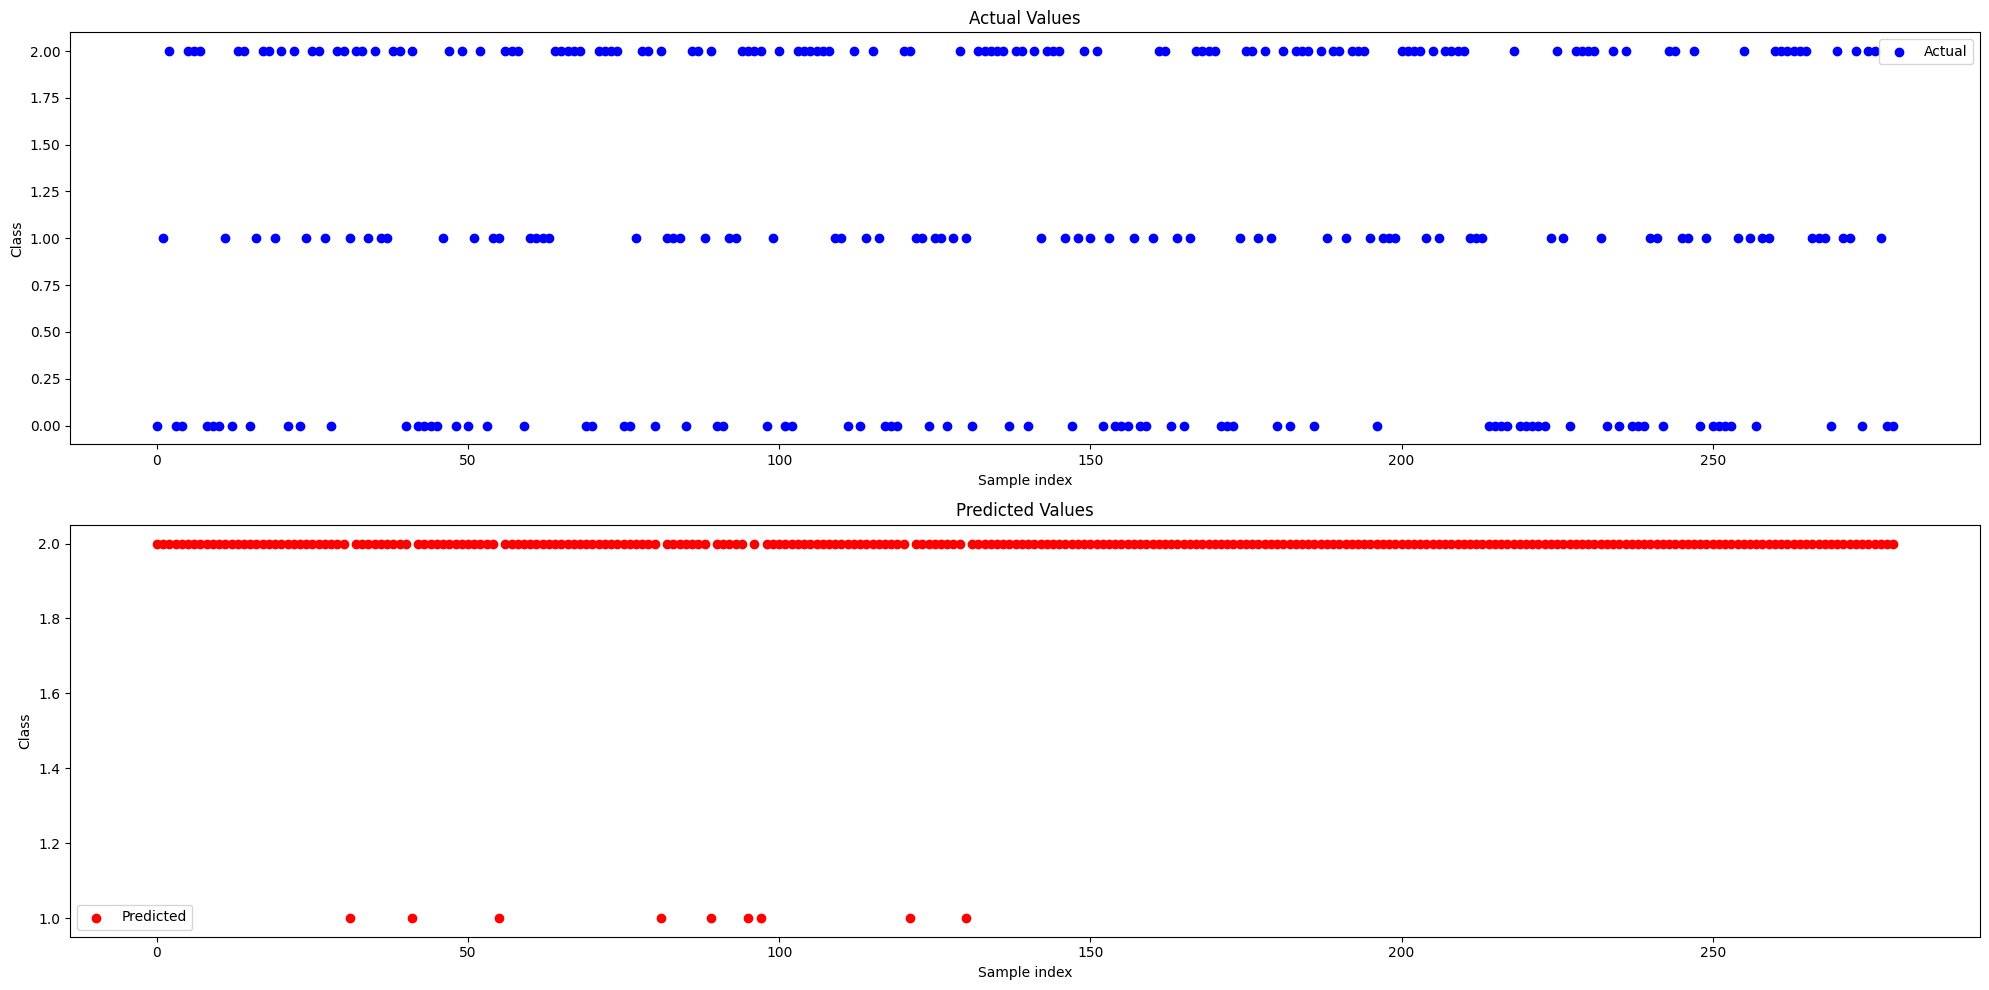

In [57]:
# 모델 예측
Y_prediction = model.predict(X_test)

# 실제값을 정수 인코딩된 형태로 추출
y_test_int = y_test

# 예측값을 정수 인코딩된 형태로 변환 (가장 확률이 높은 클래스의 인덱스)
pred_class = np.argmax(Y_prediction, axis=1)

# 그래프 생성
fig, axs = plt.subplots(2, 1, figsize=(20, 10))

# 실제값을 그래프로 그리기
axs[0].scatter(range(len(y_test_int)), y_test_int, color='blue', label='Actual')
axs[0].set_title('Actual Values')
axs[0].set_xlabel('Sample index')
axs[0].set_ylabel('Class')
axs[0].legend()

# 예측값을 그래프로 그리기
axs[1].scatter(range(len(pred_class)), pred_class, color='red', label='Predicted')
axs[1].set_title('Predicted Values')
axs[1].set_xlabel('Sample index')
axs[1].set_ylabel('Class')
axs[1].legend()

# 그래프 표시
plt.tight_layout()
plt.show()

In [58]:
# model.save('match_pred_DL.h5')
# DL = model.load('match_pred_DL.h5')


In [60]:
import tensorflow as tf
DL = tf.keras.models.load_model('match_pred_DL.h5')
# 모델 평가
loss, accuracy = DL.evaluate(X_test, y_test)

# 평가 결과 출력
print(f"손실(loss): {loss:.4f}")
print(f"정확도(accuracy): {accuracy:.4f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4766 - loss: 1.0581  
손실(loss): 1.0748
정확도(accuracy): 0.4500


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


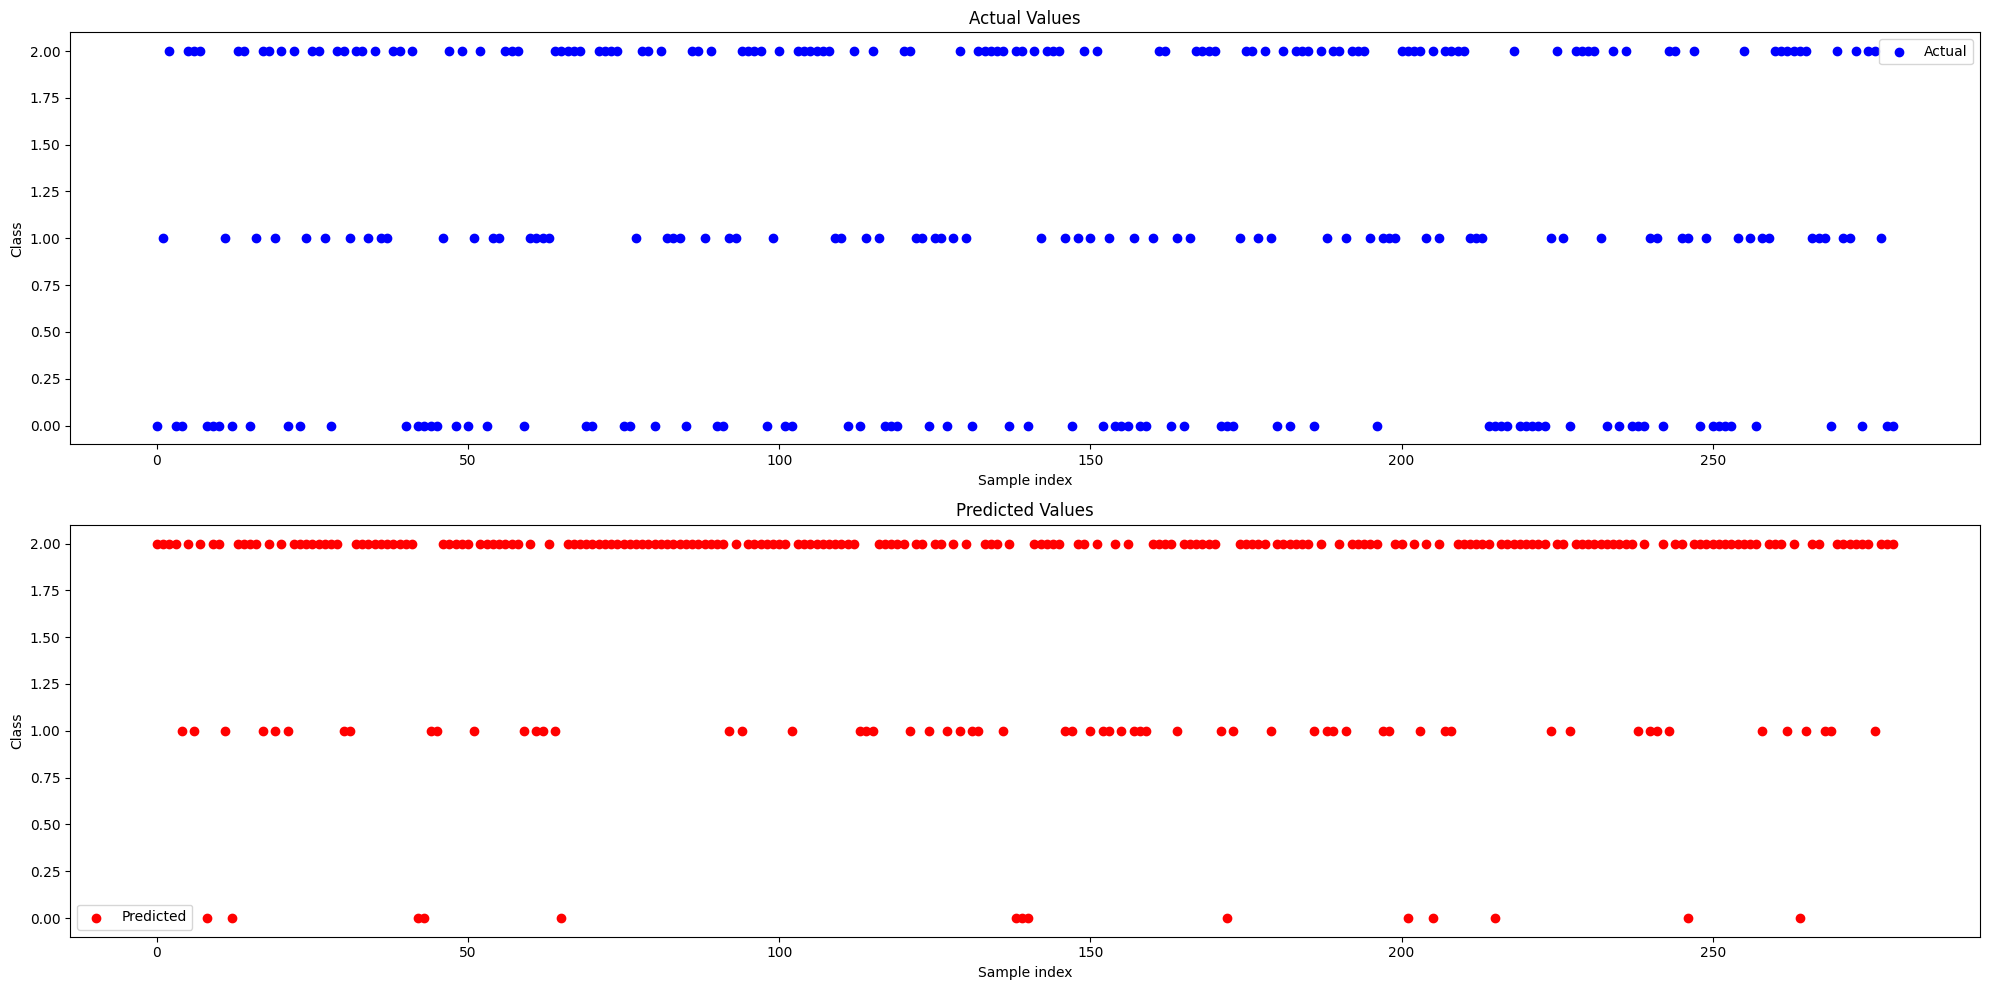

In [61]:
# 모델 예측
Y_prediction = DL.predict(X_test)

# 실제값을 정수 인코딩된 형태로 추출
y_test_int = y_test

# 예측값을 정수 인코딩된 형태로 변환 (가장 확률이 높은 클래스의 인덱스)
pred_class = np.argmax(Y_prediction, axis=1)

# 그래프 생성
fig, axs = plt.subplots(2, 1, figsize=(20, 10))

# 실제값을 그래프로 그리기
axs[0].scatter(range(len(y_test_int)), y_test_int, color='blue', label='Actual')
axs[0].set_title('Actual Values')
axs[0].set_xlabel('Sample index')
axs[0].set_ylabel('Class')
axs[0].legend()

# 예측값을 그래프로 그리기
axs[1].scatter(range(len(pred_class)), pred_class, color='red', label='Predicted')
axs[1].set_title('Predicted Values')
axs[1].set_xlabel('Sample index')
axs[1].set_ylabel('Class')
axs[1].legend()

# 그래프 표시
plt.tight_layout()
plt.show()